# TASK D: Visualize the learned image representation of each of the previous tasks

In [1]:
import pickle
import os
import cv2
import torch
import torchvision

import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import umap.umap_ as umap

from sklearn.manifold import TSNE 
from tqdm import tqdm

/opt/conda/envs/m5/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Initialize Image DataLoader 

In [2]:
DATASET = '../../MIT_split'
BATCH_SIZE = 1

# Dataset Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Folders
train_dataset = torchvision.datasets.ImageFolder(os.path.join(DATASET,'train'), transform=transform)
test_dataset = torchvision.datasets.ImageFolder(os.path.join(DATASET,'test'), transform=transform)

# Paths map(list, zip(*lot))
train_images, train_labels = map(list, zip(*[(path, label) for path, label in train_dataset.imgs]))
test_images, test_labels = map(list, zip(*[(path, label) for path, label in test_dataset.imgs]))

# Load Images
train_images = np.array([cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in tqdm(train_images)])
test_images = np.array([cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in tqdm(test_images)])

100%|██████████| 807/807 [00:02<00:00, 380.67it/s]


Read Extracted Embeddings

In [3]:
def get_embeddings(file, embedding_size):
    embedding_features = pickle.load(open(file, "rb"))
    embedding_features = np.array([item for sublist in embedding_features for item in sublist]).reshape(embedding_size)
    return embedding_features

In [4]:
train_embeddings   = get_embeddings(file = '../features/train_features_triplet.pkl', embedding_size=(len(train_images), 10))
test_embeddings   = get_embeddings(file = '../features/test_features_triplet.pkl', embedding_size=(len(test_images), 10))
train_target = train_labels
test_target = test_labels

#### Plot Features Using UMAP (Dim. Reduction)

In [5]:
# Dim Before Reduction
print(f"Train Dim Before Reduction : {train_embeddings.shape}")
print(f"Test Dim Before Reduction : {test_embeddings.shape}")

# Apply UMAP
train_umap = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation').fit_transform(train_embeddings)
test_umap = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation').fit_transform(test_embeddings)

# Dim Before Reduction
print(f"Train Dim After Reduction : {train_umap.shape}")
print(f"Test Dim After Reduction : {test_umap.shape}")

Train Dim Before Reduction : (1881, 10)
Test Dim Before Reduction : (807, 10)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Train Dim After Reduction : (1881, 2)
Test Dim After Reduction : (807, 2)


Now let's plot umap representation

Text(0.5, 1.0, 'Train UMAP Scatter Plot')

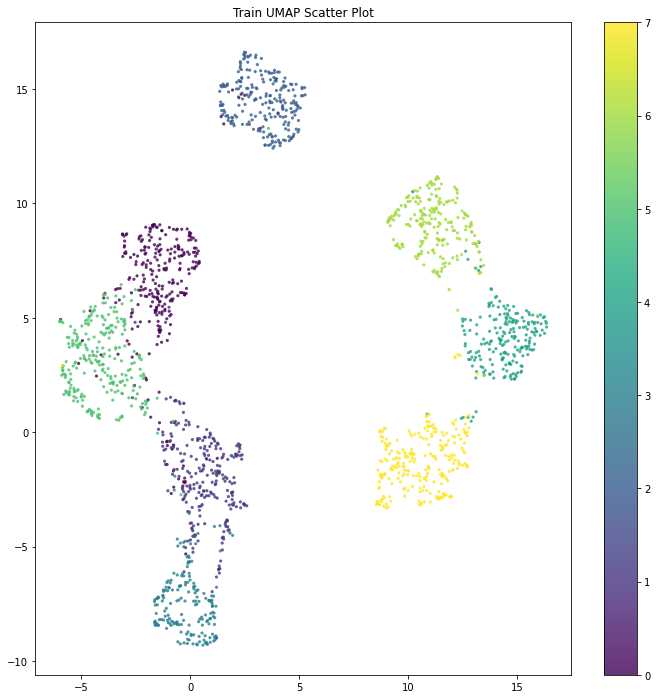

In [6]:
plt.figure(figsize=(12,12))
plt.scatter(train_umap[:, 0], train_umap[:, 1], 
            c=train_target, 
            label=train_target, 
            edgecolor='none', 
            alpha=0.80, 
            s=10)

plt.colorbar()
plt.title('Train UMAP Scatter Plot')

Text(0.5, 1.0, 'Test UMAP Scatter Plot')

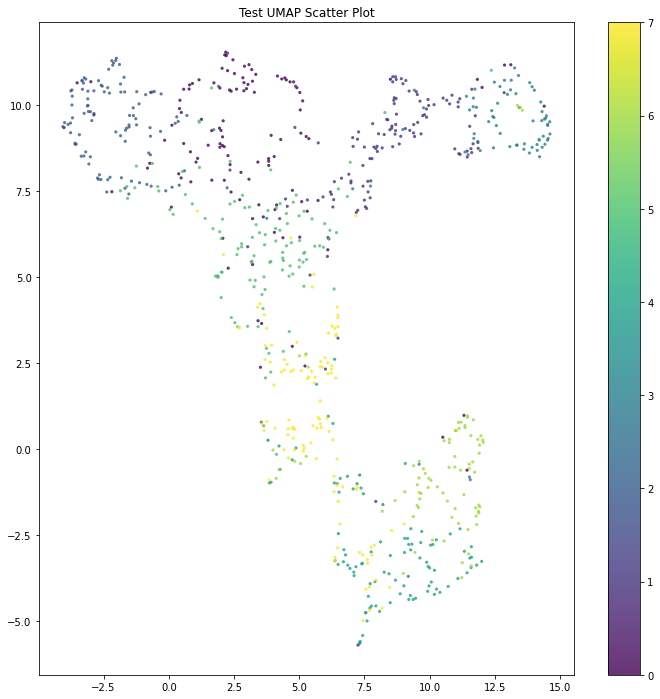

In [7]:
plt.figure(figsize=(12,12))
plt.scatter(test_umap[:, 0], test_umap[:, 1], 
            c=test_target, 
            label=test_target, 
            edgecolor='none', 
            alpha=0.80, 
            s=10)

plt.colorbar()
plt.title('Test UMAP Scatter Plot')

#### Plot Features Using TSNE (Dim. Reduction)

In [8]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
train_tsne = tsne.fit_transform(train_embeddings)
test_tsne = tsne.fit_transform(test_embeddings)

/opt/conda/envs/m5/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/envs/m5/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1881 samples in 0.002s...
[t-SNE] Computed neighbors for 1881 samples in 0.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1881
[t-SNE] Computed conditional probabilities for sample 1881 / 1881
[t-SNE] Mean sigma: 0.288975
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.598251
[t-SNE] KL divergence after 2000 iterations: 0.761627
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 807 samples in 0.001s...
[t-SNE] Computed neighbors for 807 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 807 / 807
[t-SNE] Mean sigma: 0.425907


/opt/conda/envs/m5/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/envs/m5/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.533951
[t-SNE] KL divergence after 2000 iterations: 0.627105


Now let's plot TSNE representation

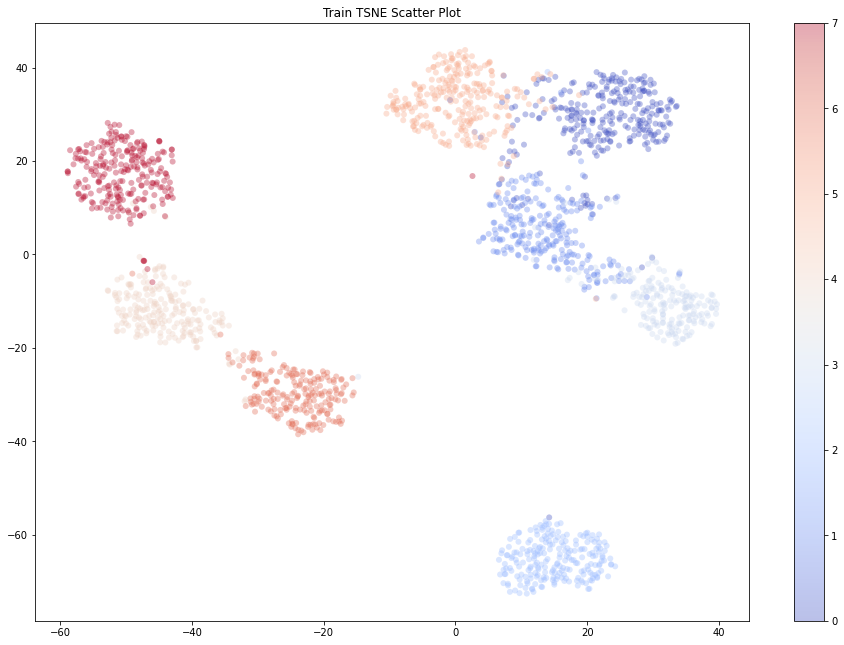

In [9]:
plt.figure(figsize = (16,11))
plt.scatter(train_tsne[:,0],train_tsne[:,1],  c = train_target, label=train_target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('Train TSNE Scatter Plot')
plt.show()

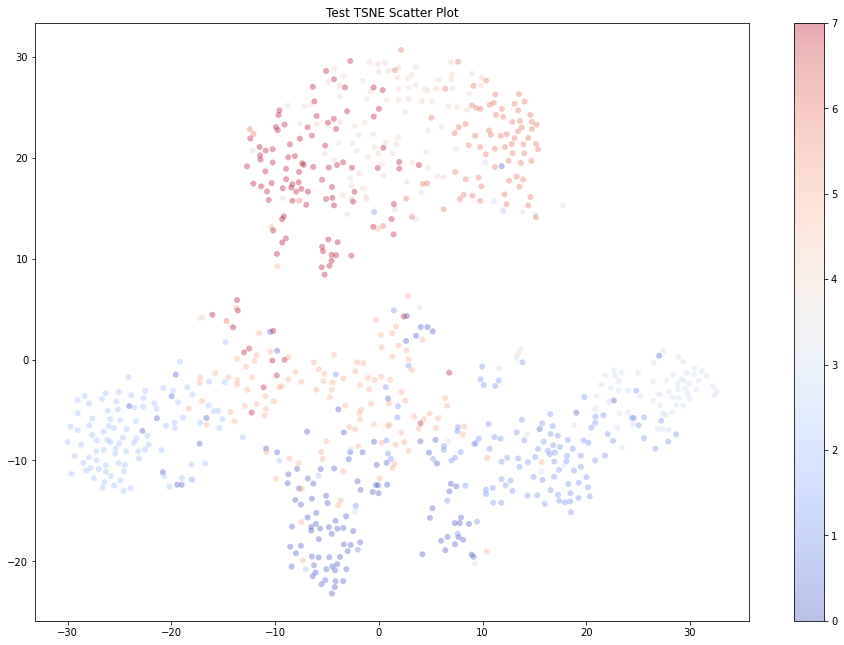

In [10]:
plt.figure(figsize = (16,11))
plt.scatter(test_tsne[:,0],test_tsne[:,1],  c = test_target, label=test_target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('Test TSNE Scatter Plot')
plt.show()